# Climate Analysis and Exploration

To begin, use Python and SQLAlchemy to do basic climate analysis and data exploration of your climate database. All of the following analysis should be completed using SQLAlchemy ORM queries, Pandas, and Matplotlib.

Use the provided starter notebook and hawaii.sqlite files to complete your climate analysis and data exploration.

Choose a start date and end date for your trip. Make sure that your vacation range is approximately 3-15 days total.

Use SQLAlchemy create_engine to connect to your sqlite database.

Use SQLAlchemy automap_base() to reflect your tables into classes and save a reference to those classes called Station and Measurement.

In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [53]:
import numpy as np
import pandas as pd

In [54]:
from datetime import datetime, timedelta
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [55]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from sqlalchemy.sql.expression import text

In [56]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [57]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [58]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [59]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [60]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [61]:
# Get a list of column names and types
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])


id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [62]:
# Get a list of column names and types
columns = inspector.get_columns('station')
for c2 in columns:
    print(c2['name'], c2["type"])


id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [63]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [64]:
first_row = session.query(Measurement).first()
first_row.__dict__
#PRCP Total Precipitation
#TOBS Temperatue at observation time 

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x123a78898>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1}

In [65]:
first_row2 = session.query(Station).first()
first_row2.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1212e11d0>,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397',
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US'}

# Exploratory Climate Analysis

In [66]:
# Find the maxDate for precipation data
maxYear=session.query(func.extract('year',func.max(Measurement.date))).all() 
maxMonth=session.query(func.extract('month',func.max(Measurement.date))).all() 
maxDay=session.query(func.extract('day',func.max(Measurement.date))).all() 

session.query(func.max(Measurement.date)).all() 

# Calculate the date 1 year ago from the last data point in the database
start_date = dt.date(maxYear[0][0]-1, maxMonth[0][0], maxDay[0][0])
start_date

datetime.date(2016, 8, 23)

In [67]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# which corresponds to a year before the maxDate
# Perform a query to retrieve the date and precipitation scores
# Sort the results by date
prcpResult=session.query(Measurement.date,\
              Measurement.prcp)\
.filter(Measurement.prcp != None)\
.filter(Measurement.date >= dt.date(maxYear[0][0]-1, maxMonth[0][0], maxDay[0][0])).\
order_by(Measurement.date).all()


In [68]:
# Unpack the date and prcp from results and save into separate lists
dateValues = [result[0] for result in prcpResult]
prcpValues = [result[1] for result in prcpResult]

In [119]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Use Pandas to calcualte the summary statistics for the precipitation data
precip = {'date': dateValues,
          'precipitation': prcpValues}
precipDF = pd.DataFrame(precip)
precipDF.set_index('date')

# Use Pandas to calcualte the summary statistics for the precipitation data
precipDF.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


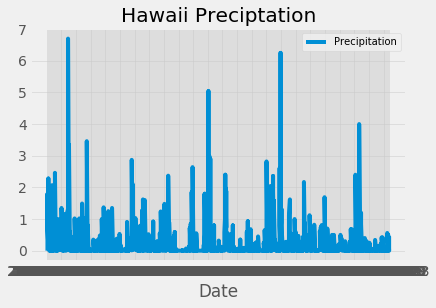

In [235]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure()
ax = plt.axes()
ax.plot(dateValues, prcpValues)
plt.title("Hawaii Preciptation")
plt.xlabel("Date")
legend=plt.legend(['Precipitation'],loc='best', fontsize=10)
ax.grid(which='major', axis='both', linestyle='-', linewidth=0.5)
plt.savefig('figure_1_Hawaii_Precipitation.pdf', dpi=300) 
#plt.show

In [72]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).count() 

9

In [162]:
session.query(Station.id,Station.station, Station.name).all()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US'),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US'),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US'),
 (4, 'USC00517948', 'PEARL CITY, HI US'),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US'),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US'),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US'),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US'),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US')]

In [73]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station,func.count()).\
        group_by(Measurement.station).\
        order_by(func.count().desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [74]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
session.query(func.min(Measurement.tobs).label('lowest temperature'),\
              func.max(Measurement.tobs).label('hightest temperature'),
              func.avg(Measurement.tobs).label('avg temperature'),
              func.max(Measurement.date)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067, '2017-08-18')]

In [75]:
maxYear2=session.query(func.extract('year',func.max(Measurement.date))).filter(Measurement.station == 'USC00519281').all() 
maxMonth2=session.query(func.extract('month',func.max(Measurement.date))).filter(Measurement.station == 'USC00519281').all() 
maxDay2=session.query(func.extract('day',func.max(Measurement.date))).filter(Measurement.station == 'USC00519281').all() 


# Calculate the date 1 year ago from the last data point in the database
start_date2 = dt.date(maxYear2[0][0]-1, maxMonth2[0][0], maxDay2[0][0])
start_date2

datetime.date(2016, 8, 18)

In [101]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobsResult=session.query(Measurement.date,\
              Measurement.tobs)\
.filter(Measurement.prcp != None)\
.filter(Measurement.station == 'USC00519281')\
.filter(Measurement.date >= start_date2).\
order_by(Measurement.date).all()

In [102]:
# Unpack the date and prcp from results and save into separate lists
tobsValues = [result[1] for result in tobsResult]

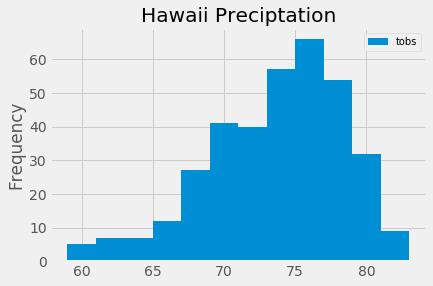

In [227]:
num_bins = 12
n, bins, patches = plt.hist(tobsValues, num_bins)
plt.ylabel('Frequency')
plt.title("Hawaii Preciptation")
plt.legend(['tobs'],loc='best', fontsize=10)
plt.savefig('figure_2_Hawaii_Temperatures.pdf', dpi=300)  
plt.show()

In [163]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [165]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
# My trip startDate Oct 6 through Oct 15
print(calc_temps('2016-10-06', '2016-10-15'))

[(71.0, 77.53225806451613, 82.0)]


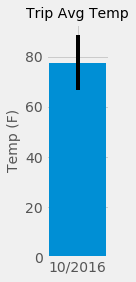

In [236]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tavg = (77.53)
x = ('10/2016')
tempVariance = 82-71
plt.figure(figsize=(1,4))
plt.bar(x, tavg, width=0.5, yerr=tempVariance)
plt.ylabel('Temp (F)', fontsize=14)
plt.title('Trip Avg Temp',  fontsize=14)
plt.savefig('figure_3_Hawaii_Vacation_Average_Temperature.pdf', dpi=300)  
plt.show()

In [267]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
session.query(Measurement.station,Station.name,Station.latitude,\
    Station.longitude, Station.elevation, func.sum(Measurement.prcp)).\
        filter(Measurement.station == Station.station).\
        group_by(Measurement.station,Station.name,Station.latitude,\
    Station.longitude, Station.elevation).\
        order_by(func.sum(Measurement.prcp).desc()).all()


[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  1068.0899999999956),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  588.6399999999976),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  382.61999999999847),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  295.67999999999944),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  234.49000000000026),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0,
  131.62000000000063),
 ('USC00511918',
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9,
  92.68000000000006),
 ('USC00518838',
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6,
  70.87000000000005),
 ('USC00517948',
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9,
  43.44000000000002)]

## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
